# Binomial-Filter

## Implementierung des Binomial-Filters


### Imports:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Binomial Matrix generieren

Zuerst muss eine Filtermaske für die spätere Faltung mit dem Bild erstellt werden.
Dabei wird nach den folgenden Schritten vorgegangen:


1. P(n) => n-te Zeile des Pascal-Dreiecks finden und als Array zurückgegeben
2. Aus dem Array die Filtermatrix berechnen mit:

\begin{equation*}
B^n := (B^n)^t * B^n  mit  B^n := \frac{1}{2^n} P(n)\\
\end{equation*}

### Pascal Dreieck

Die definierte rekursive Funktion pascal_row(n) findet die n-te Zeile des Pascal Dreiecks und gibt diese Zeile als numpy array zurück.
Bsp: pascal_row(3) = array([1., 3., 3., 1.])

In [2]:
def pascal_row(line_number: int) -> np.ndarray:
    if line_number == 0: # in der nullten Zeile (also an der Spitze) steht nur eine Eins
        return [1]
    else:
        result = np.zeros(line_number+1) # in der i-ten Zeile stehen i+1 Zahlen
        result[0] = 1 # am Anfang und am..
        result[-1] = 1 # ..Ende jeder Zeile steht eine Eins
        for i in range(1, line_number):
            result[i] = pascal_row(line_number-1)[i-1] + pascal_row(line_number-1)[i] # jede Zahl ergibt sich durch Addition zweier Zahlen aus der darüberliegenden Zeile
    return result

### Filtermatrix berechnen

Die Funktion gen_binom_matrix(n) berechnet die Filtermatrix der Größe n * n.\
Dafür wird das array, welches P(n) representiert zuerst transponiert und dann mit sich selbst multipliziert.\
Anschließend wird die Matrix mit dem Skalar \begin{equation*} \frac{1}{2^{2*n}} \end{equation*} multipliziert.


In [3]:
def gen_binom_matrix(n: int) -> np.ndarray:
    if n == 0:
        ret = np.ndarray(1)
        ret[0] = 1
        return ret
    b = pascal_row(n)[np.newaxis]
    b_t = b.T
    c=b_t*b
    c= (1/(2**(2*n)))*c
    return c
        

## Implementierung der Faltung

Die Faltung von Bild und Filtermatrix wird in der Funktion convo(bild_in, filter_in) realisiert.\
Die Größe des Resultierenden Bilds entspricht der Größe des Eingangsbildes.\
Für die Funktion wird davon ausgegangen, dass nur Graustufen Bilder verwendet werden.\
Vorgehen:

- Rahmen um das Bild erstellen, für die Faltung an den Randbereichen des Bilds
- Rahmen der einfachheit mit 0 füllen (->schwarz)
- Durch jeden Bildpunkt iterieren und die Faltung mit den Nachbarpunkten und der Filtermaske durchführen
- Neu berechnete Bildpunkte zurückgeben (ohne den erstellten Rahmen!)


In [4]:
def convo(grey_img, binom_matrix):
    print("filter matrix Shape : {}".format(binom_matrix.shape))
    
    image_row, image_col = grey_img.shape
    kernel_row, kernel_col = binom_matrix.shape

    output = np.zeros(grey_img.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = grey_img

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(binom_matrix * padded_image[row:row + kernel_row, col:col + kernel_col])

    print("Output Image size : {}".format(output.shape))
    return output
    
    

## Visualisierung
### Anwenden der Methoden
Jetzt können die definierten Funktionen ausgeführt und das Ergebnis visualisiert werden.\
Dafür wird das Bild "Lenna.png" geladen und in Graustufen formatiert. Dann wird die Filtermaske generiert (hier mit P(8), also 9x9 Matrix ).\
Auf das Graustufenbild kann dann die Faltung angewandt werden.


In [5]:
image = cv2.imread("Ape.jpeg")
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x = 8
binom = gen_binom_matrix(x)
result = convo(grey_img, binom)

filter matrix Shape : (9, 9)
Output Image size : (480, 512)


### Bilder zeichnen

(-0.5, 511.5, 479.5, -0.5)

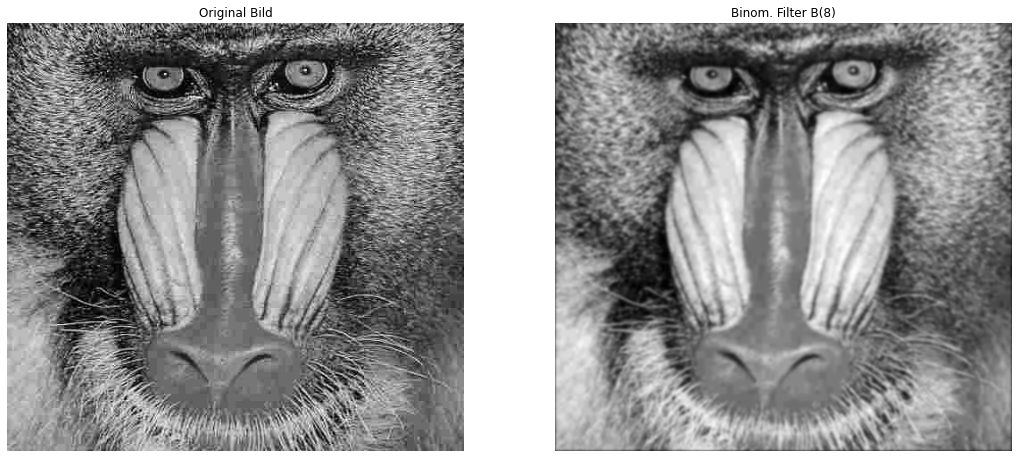

In [6]:
fig = plt.figure(figsize=(18, 18))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0], title="Original Bild")
ax2 = fig.add_subplot(gs[0, 1], title="Binom. Filter B({})".format(x))
ax1.imshow(grey_img, cmap='gray')
ax1.axis('off')
ax2.imshow(result, cmap='gray')
ax2.axis('off')